## "Toy" tutorial of using keras to build simple nerual network

Reference: https://campus.datacamp.com/courses/deep-learning-in-python/

### General Procedure

1. Specify network architecture: layer, activation functions;
2. Compile network: optimizer, loss function;
3. Fit network
4. Prediction

In [1]:
# load data first
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
os.chdir('c:\\users\\bangda\\desktop\\dl-datacamp')
hourly_wages = pd.read_csv('hourly_wages.csv')
mnist = pd.read_csv('mnist.csv')
titanic_all_numeric = pd.read_csv('titanic_all_numeric.csv')

In [2]:
X = hourly_wages.iloc[:, 1:].values
y = hourly_wages.iloc[:, 0].values

### Example 1 - Regression

#### 1. Specify model

* For regression problem, `activation = 'relu'` could be one choice;
* For classification problem, `activation = 'softmax'` could be one choice;

In [3]:
import keras
from keras.layers import Dense # nodes by nodes
from keras.models import Sequential # layers are arranged sequantially

Using Theano backend.


In [4]:
model = Sequential()

Add input layer with 50 nodes

In [5]:
model.add(Dense(50, activation = 'relu', input_shape = (X.shape[1], )))

Add hidden layer (second layer)

In [6]:
model.add(Dense(32, activation = 'relu'))

Output layer

In [7]:
model.add(Dense(1))

#### 2. Compile the model

* `optimizer = 'adam'` is a common choice, see alsp `'sgd'`
* For regression problem, using `loss = mean_squared_error`

In [8]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### 3. Fit and Prediction

In practice we usually just take subset of the data to calculate gradient, called one **batch**; different batch of data are used to calculate the next update. If all data is used, it will start over again (called one **epoch**) since the selection of batch is random.

In [9]:
model.fit(X, y)
y_pred = model.predict(X)

Epoch 1/10
534/534 [==============================] - 0s - loss: 26.7534     
Epoch 2/10
534/534 [==============================] - 0s - loss: 22.0352     
Epoch 3/10
534/534 [==============================] - 0s - loss: 21.4564     
Epoch 4/10
534/534 [==============================] - 0s - loss: 21.1474     
Epoch 5/10
534/534 [==============================] - 0s - loss: 21.4855     
Epoch 6/10
534/534 [==============================] - 0s - loss: 20.6640     
Epoch 7/10
534/534 [==============================] - 0s - loss: 21.1199     
Epoch 8/10
534/534 [==============================] - 0s - loss: 20.7611     
Epoch 9/10
534/534 [==============================] - 0s - loss: 20.2715     
Epoch 10/10
534/534 [==============================] - 0s - loss: 20.5104     


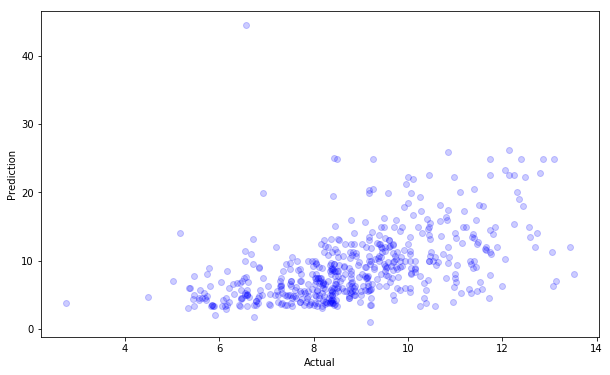

In [10]:
mpl.rcParams['figure.figsize'] = (10, 6)
plt.plot(y_pred, y, 'bo', alpha = .2)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

### Example 2 - Classification

We need one convert step to convert the target variable, for example if it is a binary classification, use (0, 1) and (1, 0). Also use `activation = 'softmax'` in output layer; use `loss = 'categorical_crossentropy'`, and `metrics = ['accuracy']`

In [11]:
X = titanic_all_numeric.iloc[:, 1:].values
y = titanic_all_numeric.iloc[:, 0].values

In [12]:
from keras.utils import to_categorical
y_actual = y.copy()
y = to_categorical(y)

#### 1. General Framework

In [13]:
clf = Sequential()
clf.add(Dense(32, activation = 'relu', input_shape = (X.shape[1], )))
clf.add(Dense(2, activation = 'softmax')) # since it's binary classification
clf.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
clf.fit(X, y)

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.9056 - acc: 0.6038     
Epoch 2/10
891/891 [==============================] - 0s - loss: 1.2187 - acc: 0.6521     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.8089 - acc: 0.6364     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6931 - acc: 0.6734     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6556 - acc: 0.6599     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.6129 - acc: 0.6790     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.6199 - acc: 0.6846     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.6039 - acc: 0.7071     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5996 - acc: 0.7048     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5999 - acc: 0.7003     


In [14]:
y_pred = clf.predict(X)
y_pred_prob_true = y_pred[:, 1]
y_pred_binary = [1 if prob > .5 else 0 for prob in y_pred_prob_true]

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_actual, y_pred_binary)

array([[526,  23],
       [258,  84]])

In [16]:
print(classification_report(y_actual, y_pred_binary))

             precision    recall  f1-score   support

          0       0.67      0.96      0.79       549
          1       0.79      0.25      0.37       342

avg / total       0.71      0.68      0.63       891



#### 2. Optimization and parameter tuning

(1) changing optimization parameters

* learning rate

(2) early stopping

* `from keras.callbacks import EarlyStopping`
* `.fit(X, y, validation_split = 0.3, epochs = 30, callbacks = [EarlyStopping(patience = 2)])`

(3) add more node in one layer (wider networks)

(4) add more layers